## Reconstruction of DOSY NMR signals 

Notebook by Gabriel Ruault and Ethan Trentin

## Part I

#### 2. Generation of synthetic data

1.  Download on the website the diffusion signal $\overline{x} \in \mathbb{R}^N$ , with size $N = 200$.


2. Creation of $T$ using an exponential sampling strategy : $(\forall n \in \{1, . . . , N \}), \text{ } T^{(n)} = T_{min}exp(-(n − 1)\frac{log(\frac{Tmin}{Tmax})}{N-1})$ with $T_{min} = 1$ and $T_{max} = 1000$.

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [2]:
N = 200
T_min = 1 
T_max = 1000

In [3]:
N_values = np.arange(1, N+1)
T_values = [T_min*np.exp(-(i-1)*np.log(T_min/T_max)/(N-1)) for i in N_values]
T_values

[1.0,
 1.0353218432956621,
 1.0718913192051278,
 1.109752496412072,
 1.1489510001873091,
 1.1895340673703196,
 1.2315506032928256,
 1.275051240713013,
 1.3200884008314178,
 1.3667163564620064,
 1.414991297434576,
 1.4649713983072858,
 1.5167168884709228,
 1.5702901247293772,
 1.625755666443794,
 1.6831803533309568,
 1.7426333860096501,
 1.8041864093920723,
 1.8679135990207825,
 1.9338917504552309,
 2.0022003718155843,
 2.0729217795953714,
 2.1461411978584044,
 2.2219468609395236,
 2.300430119772918,
 2.381685551976158,
 2.465811075822603,
 2.552908068239517,
 2.643081486974105,
 2.7364399970746707,
 2.8330961018393244,
 2.9331662783900443,
 3.036771118035458,
 3.1440354715914998,
 3.255088599835058,
 3.3700643292719286,
 3.4891012134067725,
 3.6123426997094312,
 3.739937302478797,
 3.8720387818125555,
 4.008806328898465,
 4.150404757850475,
 4.297004704320841,
 4.448782831127585,
 4.6059220411451065,
 4.768611697714469,
 4.937047852839003,
 5.111433483440167,
 5.291978735958441,
 5.478

3. Display the original signal $\overline{x}$ as a function of $T$ (use log scale on the horizontal axis).

In [4]:
path = sys.path[0]
data = pd.read_csv(path+"\\x.txt", header=None) # header = None not to have the first value as the column name 
data.columns=['x'] # We name the column 
data

,x
0,2.044046e-15
1,9.534637e-15
2,4.273128e-14
3,1.839992e-13
4,7.612267e-13
...,...
195,2.262232e-22
196,8.618724e-23
197,3.250917e-23
198,1.214020e-23


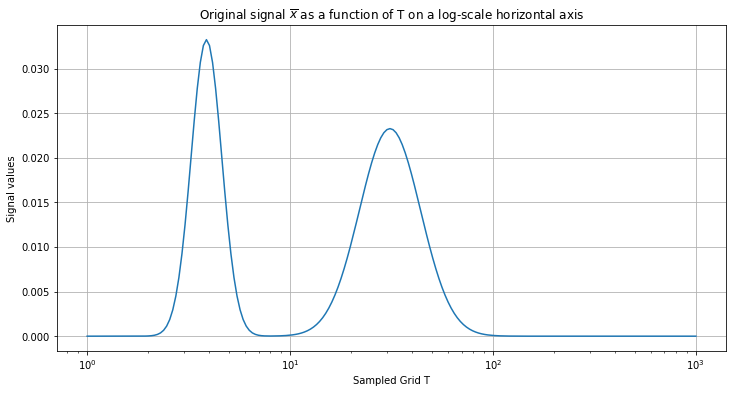

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(T_values, data)
plt.xscale('log')
plt.xlabel("Sampled Grid T")
plt.ylabel("Signal values")
plt.title("Original signal $\overline{x}$ as a function of T on a log-scale horizontal axis")
plt.grid()
plt.show()

4. Create $t$ using a regular sampling strategy : $(\forall m \in \{1, . . . , M \}), \text{ }t^{(m)} = t_{min} + \frac{m − 1}{M − 1}(t_{max} − t_{min})$, with $M = 50$, $t_{min} = 0$, and $t_{max} = 1.5$.

In [6]:
M = 50
t_min = 0
t_max = 1.5

In [7]:
M_values = np.arange(1,M+1)
t_values = [t_min + (m-1)/(M-1)*(t_max-t_min) for m in M_values]
t_values

[0.0,
 0.030612244897959183,
 0.061224489795918366,
 0.09183673469387754,
 0.12244897959183673,
 0.15306122448979592,
 0.18367346938775508,
 0.21428571428571427,
 0.24489795918367346,
 0.2755102040816327,
 0.30612244897959184,
 0.336734693877551,
 0.36734693877551017,
 0.3979591836734694,
 0.42857142857142855,
 0.45918367346938777,
 0.4897959183673469,
 0.5204081632653061,
 0.5510204081632654,
 0.5816326530612245,
 0.6122448979591837,
 0.6428571428571428,
 0.673469387755102,
 0.7040816326530612,
 0.7346938775510203,
 0.7653061224489797,
 0.7959183673469388,
 0.8265306122448979,
 0.8571428571428571,
 0.8877551020408163,
 0.9183673469387755,
 0.9489795918367347,
 0.9795918367346939,
 1.010204081632653,
 1.0408163265306123,
 1.0714285714285714,
 1.1020408163265307,
 1.1326530612244898,
 1.163265306122449,
 1.193877551020408,
 1.2244897959183674,
 1.2551020408163267,
 1.2857142857142856,
 1.316326530612245,
 1.346938775510204,
 1.3775510204081634,
 1.4081632653061225,
 1.4387755102040816,


5. Construct matrix $K$ using $(\forall m \in \{1, . . . , M \}), (\forall n \in\{1, . . . , N \}), \text{ } K^{(m,n)} = exp(−T^{(n)}t^{(m)})$

In [8]:
K_matrix = np.array([[np.exp(-T_values[n]*t_values[m]) for n in range(len(T_values))] for m in range(len(t_values))])
K_matrix

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.69851565e-01, 9.68803450e-01, 9.67719507e-01, ...,
        3.95314811e-13, 1.44159827e-13, 5.07307125e-14],
       [9.40612058e-01, 9.38580124e-01, 9.36481044e-01, ...,
        1.56273800e-25, 2.07820558e-26, 2.57360519e-27],
       ...,
       [2.37218052e-01, 2.25463789e-01, 2.13907633e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30066299e-01, 2.18430097e-01, 2.07002589e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.23130160e-01, 2.11615831e-01, 2.00320443e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [9]:
np.shape(K_matrix)

(50, 200)

6. Simulate the noisy data according to model $y = K \overline{x} + w$, by taking $w \sim \mathcal{N}(0, \sigma^2I_M)$
with $\sigma = 0.01z^{(1)}$, where $z = K\overline{x}$.

In [10]:
data = np.array(data).flatten()
z = K_matrix@data
z

array([1.        , 0.59453035, 0.42314271, 0.33431311, 0.27922552,
       0.24003554, 0.20949458, 0.18434982, 0.1629835 , 0.14449856,
       0.1283399 , 0.11412789, 0.10158085, 0.09047691, 0.080634  ,
       0.07189869, 0.06413946, 0.05724233, 0.05110784, 0.04564876,
       0.04078841, 0.03645918, 0.03260141, 0.02916234, 0.02609534,
       0.02335909, 0.020917  , 0.01873665, 0.01678928, 0.01504936,
       0.01349424, 0.01210381, 0.0108602 , 0.00974751, 0.00875163,
       0.00786   , 0.00706143, 0.00634598, 0.00570479, 0.00512995,
       0.00461445, 0.004152  , 0.00373701, 0.00336451, 0.00303002,
       0.00272959, 0.00245966, 0.00221706, 0.00199895, 0.00180282])

In [11]:
sigma = 0.01*z[0]
mu = np.zeros(M)
var = (sigma**2)*np.eye(M)
np.random.seed(42)
w = np.random.multivariate_normal(mu, var) # Multiplicative noise 
w

array([ 0.00496714, -0.00138264,  0.00647689,  0.0152303 , -0.00234153,
       -0.00234137,  0.01579213,  0.00767435, -0.00469474,  0.0054256 ,
       -0.00463418, -0.0046573 ,  0.00241962, -0.0191328 , -0.01724918,
       -0.00562288, -0.01012831,  0.00314247, -0.00908024, -0.01412304,
        0.01465649, -0.00225776,  0.00067528, -0.01424748, -0.00544383,
        0.00110923, -0.01150994,  0.00375698, -0.00600639, -0.00291694,
       -0.00601707,  0.01852278, -0.00013497, -0.01057711,  0.00822545,
       -0.01220844,  0.00208864, -0.0195967 , -0.01328186,  0.00196861,
        0.00738467,  0.00171368, -0.00115648, -0.00301104, -0.01478522,
       -0.00719844, -0.00460639,  0.01057122,  0.00343618, -0.0176304 ])

In [12]:
y = z + w
y

array([ 1.00496714e+00,  5.93147706e-01,  4.29619599e-01,  3.49543411e-01,
        2.76883984e-01,  2.37694169e-01,  2.25286704e-01,  1.92024168e-01,
        1.58288758e-01,  1.49924157e-01,  1.23705722e-01,  1.09470592e-01,
        1.04000476e-01,  7.13441081e-02,  6.33848212e-02,  6.62758158e-02,
        5.40111509e-02,  6.03848076e-02,  4.20275964e-02,  3.15257248e-02,
        5.54448980e-02,  3.42014203e-02,  3.32766895e-02,  1.49148614e-02,
        2.06515096e-02,  2.44683116e-02,  9.40706522e-03,  2.24936319e-02,
        1.07828897e-02,  1.21324193e-02,  7.47717400e-03,  3.06265921e-02,
        1.07252228e-02, -8.29598794e-04,  1.69770824e-02, -4.34843587e-03,
        9.15007044e-03, -1.32507172e-02, -7.57707182e-03,  7.09856720e-03,
        1.19991142e-02,  5.86568165e-03,  2.58053128e-03,  3.53468750e-04,
       -1.17551980e-02, -4.46885349e-03, -2.14673082e-03,  1.27882788e-02,
        5.43513740e-03, -1.58275832e-02])

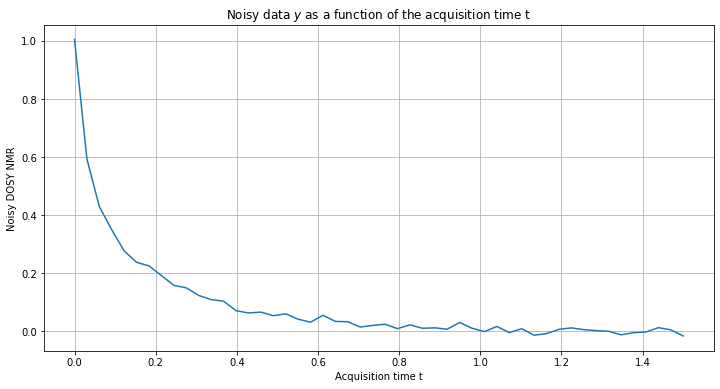

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(t_values, y)
plt.xlabel("Acquisition time t")
plt.ylabel("Noisy DOSY NMR")
plt.title("Noisy data $y$ as a function of the acquisition time t")
plt.grid()
plt.show()

#### 3. Comparison of regularization strategies

#### Smoothness prior

1. Discuss the existence and uniqueness of a solution to Problem $x_b = argmin_{x \in \mathbb{R}^N} \frac{1}{2} \Vert Kx − y \Vert^2 + \beta g(x)$.

The loss function $f(x) = \frac{1}{2}\Vert Kx - y \Vert^2 + \frac{\beta}{2}\|Dx\|^2 $ is quadratic thus continuous thus lsc. 

One easily finds that the hessian of $f$  is $ H =\frac{1}{2} K^TK + \frac{\beta}{2}D^TD$

Let us prove it is invertible by showing its kernel is $\{ 0 \}$:

$x\in \ker(H) \implies x^THx = 0 \Leftrightarrow x^TK^TKx = 0 \text{ and } x^TD^TDx = 0 \Leftrightarrow x \in \ker(K) \cap \ker(D) $ by sum of positive numbers.
$Dx = 0 \Leftrightarrow \exists \alpha, x = \alpha 1_N$
However $K \alpha 1_N \neq 0 $ since K has only strictly positive terms.
Thus $\ker(K) \cap \ker(D) = \set{0}$

Thus $\ker(H) = \set{0}$

Near $\infty$, the quadratic component of f dominates. With $x^THx$ its quadratic component, one easily shows that it tends to $+\infty$ as $x^THx \ge \lambda_{min}\Vert x \Vert^2 \rightarrow +\infty$ with $\lambda_{min} > 0$ since H is invertible. So, the function f is coercive. 

This induces the existence of a minimizer. 

For unicity, $f$ being quadratic, it is convex and especially strictly convex since its hessian is positive definite : 
H is clearly positive **semi** definite by sum of positive semi-definite matrices. As it is invertible, all of its eigenvalues are strictly positive, which proves due to the symmetry of A that it is positive definite. 

Thus the optimization problem has a unique minimizer.

2. Propose an approach to solve the problem.

3. Implement it, and display the restored signal $\hat{x}$.
4. Compute the normalized quadratic error between $\hat{x}$ and $x$ : $E(\hat{x}, \overline{x}) = \frac{\Vert \hat{x} − \overline{x} \Vert^2}{\Vert \overline{x} \Vert^2}$.

In [14]:
D = np.eye(N)
D

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
np.fill_diagonal(D[1:], -1)
D

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [16]:
D[0,-1]=-1
D

array([[ 1.,  0.,  0., ...,  0.,  0., -1.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [17]:
def normalized_quadratic_error(x_hat, x_real):
    error = np.linalg.norm(x_hat-x_real, ord = 2)**2/np.linalg.norm(x_real, ord = 2)**2
    return error

In [18]:
smallest_error = np.inf
best_beta = None
best_x_hat = None

beta_values = np.linspace(1e-2, 1e1, num = 150, endpoint=True) 
for beta in beta_values:
    x_hat = np.linalg.solve(K_matrix.T@K_matrix+beta*D.T@D, K_matrix.T@y)
    error = normalized_quadratic_error(x_hat, data)

    if error < smallest_error:
        smallest_error = error
        best_x_hat = x_hat
        best_beta = beta

best_beta

0.5463758389261745

In [19]:
print(f"The best normalized quadratic error between the original and the reconstruction signals is : {round(smallest_error, 3)}")

The best normalized quadratic error between the original and the reconstruction signals is : 0.385


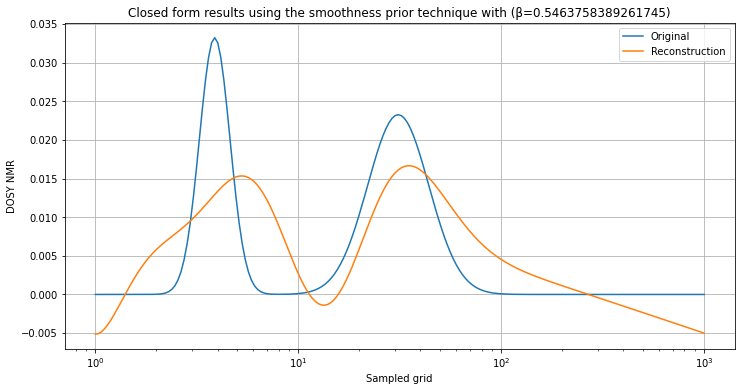

In [20]:
plt.figure(figsize=(12, 6))
plt.title(f"Closed form results using the smoothness prior technique with (β={best_beta})")
plt.plot(T_values, data, label="Original")
plt.plot(T_values, best_x_hat, label="Reconstruction")
plt.xlabel("Sampled grid")
plt.ylabel("DOSY NMR")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

#### Smoothness prior + constraints

The loss function $f(x) = \frac{1}{2}\|Kx - y\|^2 + \frac{\beta}{2}\|Dx\|^2 + \iota_{[x_{min},x_{max}]^N}(x)$ is obviously lsc and coercive, justifying the existence of a minimiser. It is such because $[x_{min},x_{max}]^N$ is a convex non empty closed set. 

By sum of a convex and a strictly convex function,  $f$ is strictly convex. This proves the unicity of the minimizer. 

We will implement **projected gradient descent** to account for the constraint given by $\iota_{[x_{min},x_{max}]^N}$.

In order to determine the step-size, we need to compute the Lipschitz constant of the gradient of $ g: x \mapsto \|Kx - y\|^2 + \frac{\beta}{2}\|Dx\|^2 $ which is given by the mean-value theorem for vector-valued functions: $ \exists c \in \text{line segment  between } x \text{ and } y, F(x) - F(y) = Jacobian(F)(c)(x-y)$. Thus for a twice differentiable vector-valued function, the lipschitz constant of $\nabla g$ is given by the spectral norm of the Hessian (or the L2-subordinate norm).

In [21]:
#Define stopping criterion 
maxiter = 100000 
x_tol = 1e-3
grad_tol = 1e-2 #larger tolerance as the change in x is  influenced by the gradient

In [22]:
#Define x_min and x_max
x_min = min(data)
x_max = max(data)

In [23]:
smallest_error = np.inf
best_beta = None
best_x_hat = None

beta_values = np.linspace(0.1, 1, num = 10, endpoint=True) 

def gradient(x,beta):
        return K_matrix.T @ (K_matrix@x - y) + beta * D.T @ D @ x

In [24]:
iter = []
for beta in beta_values :
    # Define the stepsize 
    Hessian = K_matrix.T @ K_matrix + beta * D.T @ D
    spectral_norm = np.linalg.norm(Hessian,ord=2) # 2-norm is spectral norm
    nu = spectral_norm  # lipschitz constant
    gamma = 1/nu # stepsize < 2/nu
    delta = 2 - gamma*nu/2
    Lambda = 0.9 #arbitraty for now

    assert delta - Lambda > 0    

    x_cur = np.ones(N) 
    x_next = np.zeros(N)
    iter_beta = 0
    while np.any(np.abs(x_next - x_cur) / (np.abs(x_cur) + 1e-8) > x_tol): 
        x_cur = x_next
        z_cur = x_cur - gamma * gradient(x_cur,beta) 
        x_next = x_cur + Lambda * (np.maximum(x_min, np.minimum(x_max, z_cur)) - x_cur) # Projection onto [x_min, x_max]  
        iter_beta += 1
    x_cur = x_next
    iter.append(iter_beta)

    error = normalized_quadratic_error(x_cur,data)
    if error < smallest_error:
        smallest_error = error
        best_beta = beta
        best_x_hat = x_cur

print(best_beta)

0.2


In [25]:
iter

[13266, 14063, 13747, 14501, 12606, 13117, 13722, 11857, 12250, 12704]

In [26]:
print(f"The best normalized quadratic error between the original and the reconstruction signals is : {round(smallest_error, 3)}")

The best normalized quadratic error between the original and the reconstruction signals is : 0.149


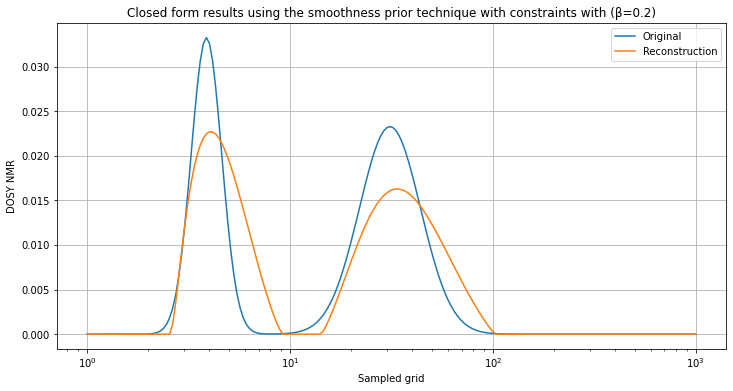

In [27]:
plt.figure(figsize=(12, 6))
plt.title(f"Closed form results using the smoothness prior technique with constraints with (β={best_beta})")
plt.plot(T_values, data, label="Original")
plt.plot(T_values, best_x_hat, label="Reconstruction")
plt.xlabel("Sampled grid")
plt.ylabel("DOSY NMR")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

#### Sparsity prior

The loss function $f(x) = \frac{1}{2}\|Kx - y\|^2 + \frac{\beta}{2}\|x\|_1$ is trivially coercive and lsc. This ensures the existence of a minimizer. Any norm is convex and thus by sum f is convex. However, the L1-norm is not striclty convex as the edges of L1-balls define portions of hyperplanes on which one can draw segments on which the L1-norm is constant thus not striclty convex. 

Similarly, $x \mapsto \|Kx - y\|^2$ is convex iff $K$ has maximal column rank. 

Thus a necessary condition for $f$ to have a unique minimizer is that $K$ has full column rank.





We will use the fact that the 1- norm is separable and that $\text{prox}_{\lambda |\cdot|} = \text{soft}_{[-\lambda,\lambda]} $

ISTA for Lasso regularization 

In [28]:
smallest_error = np.inf
best_beta = None
best_x_hat = None

beta_values = np.linspace(0.1, 1, num = 10, endpoint=True) 

In [29]:
def soft_thresholding(x,gamma, beta):
    return np.sign(x) * np.maximum(0,np.abs(x) - gamma*beta/2)

maxiter = 1000
x_tol = 1e-3
grad_tol = 1e-3 #larger tolerance as the change in x is  influenced by the gradient

for beta in beta_values :

    # Define the stepsize 
    Hessian = K_matrix.T @ K_matrix + beta * D.T @ D
    spectral_norm = np.linalg.norm(Hessian,ord=2) # 2-norm is spectral norm
    nu = spectral_norm  # lipschitz constant
    gamma = 1/nu # stepsize < 2/nu
    delta = 2 - gamma*nu/2
    Lambda = 0.9 #arbitraty for now

    assert delta - Lambda > 0
    
    x_cur = np.ones(N) 
    x_next = np.zeros(N)
    iter_beta = 0
    while np.any(np.abs(x_next - x_cur) / (np.abs(x_cur) + 1e-8) > x_tol): 
        x_cur = x_next
        z_cur = x_cur - gamma * gradient(x_cur,beta) 
        x_next = z_cur + Lambda * (soft_thresholding(z_cur, gamma, beta)- x_cur)# Projection onto [x_min, x_max]   
    x_cur = x_next

    error = normalized_quadratic_error(x_cur,data)
    if error < smallest_error:
        smallest_error = error
        best_beta = beta
        best_x_hat = x_cur

print(best_beta)

0.2


In [30]:
print(f"The best normalized quadratic error between the original and the reconstruction signals is : {round(smallest_error, 3)}")

The best normalized quadratic error between the original and the reconstruction signals is : 0.118


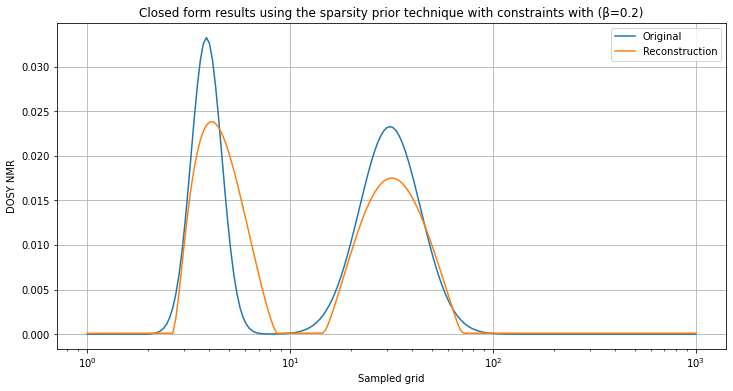

In [31]:
plt.figure(figsize=(12, 6))
plt.title(f"Closed form results using the sparsity prior technique with constraints with (β={best_beta})")
plt.plot(T_values, data, label="Original")
plt.plot(T_values, best_x_hat, label="Reconstruction")
plt.xlabel("Sampled grid")
plt.ylabel("DOSY NMR")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

## Part II

#### 1. Maximum entropy regularization
In the context of DOSY NMR data processing, a standard strategy for restoring the target signal is to define it as the solution of the so-called maximum entropy problem : $\hat{x} = argmin_{x \in \mathbb{R}^N} \frac{1}{2} \Vert Kx − y \Vert^2 + \beta ent(x)$ where $(\forall x \in \mathbb{R}^N), ent(x) = \sum_{n=1}^N \phi(x^(n))$, with $(\forall u \in \mathbb{R}),
\varphi(u) =
\begin{cases} 
    u \log u & \text{if } u > 0, \\
    0 & \text{if } u = 0, \\
    +\infty & \text{elsewhere.}
\end{cases}$



1. Is ent convex ? proper ? lower-semicontinuous ? differentiable ?

$\text{ent}$ is proper as $\text{ent}(1_N) =\sum_{n=1}^N 0 = 0 \neq +\infty$ thus its domain is non empty.

$\text{ent}$ is lower semi-continuous as one can  see the epigraph of $\phi$ is closed given $\phi$ is continuous on $[0,+\infty[$ which contains 0.

Thus the epigraph of $\text{ent}$ taken as the cartesian product of the epigraphs is also closed.
 

$\phi$ is convex on $]0,+ \infty[$ as its  derivative $\phi'(u) = \frac{1}{u} \geq 0$ for $u>0$ and since $\lim_{u \to 0}\phi(u) = 0$, $\phi$ can be extended into a differentiable convex function over its domain . Given its domain is convex, $\phi$ is convex. Thus its epigraph is convex and taking the cartesian product, the epigraph of $\text{ent}$ is convex.

Thus $\text{ent}$ is convex

As the second derivatives are striclty positive on the interior of the domain, $\text{ent}$ is strictly convex.

It is however only differentiable on $]0,+\infty[^N$.

2. Has the optimization problem a solution ? Is it unique ?

The quadratic term is convex and since $\text{ent}$ is strictly convex on its domain then the cost function is strictly convex on its domain. $\text{ent}$ is clearly coercive as $u\log(u)\to +\infty$ as $u \to +\infty$. For negative values $\text{ent}$ is set by default at infinity.

The optimization thus has a unique solution.

3. Give the expression of the proximity operator of ent at some $x \in \mathbb{R}^N$ (Hint : Use the Lambert W-function).

To compute the proximal operator of $\text{ent}$ we use the fact it is separable and compute the proximal operator of $\phi$
$\text{prox}_{\phi}(x) = \argmin_{y \in \mathbb{R}^{+*}}(f_x(y)= y\log(y) + \frac{1}{2\gamma}\|y-x\|^2)$

The $\text{argmin}$ is over the domain $\mathbb{R}^{+*}$ as clearly the minimum of ent cannot be outside of the domain.

We thus differentiate $f_x(y)$ and set  $1 + \log(y) + \frac{1}{\gamma}(y-x) = 0$
Thus $y \exp(\frac{y}{\gamma})=\exp(\frac{1}{\gamma}x-1)$ which we rewrite as
$\frac{y}{\gamma} \exp(\frac{y}{\gamma})=\exp(\frac{1}{\gamma}x-1-\log(\gamma))$
and thus $\text{prox}_{\gamma \phi}(x) = \gamma W(\exp(\frac{1}{\gamma}x-1-\log(\gamma)))$

Since ent is clearly separable we deduce from this the proximal operator of ent:

$\text{prox}_{\gamma \text{ent}}(x) = \left( \gamma W\left(\exp\left(\frac{1}{\gamma}x^{(n)} - 1 - \log(\gamma)\right)\right)\right)_{n \in [1, N]}$.

The lambert function does not have a closed form expression. It is however an inverse  function and we can use Newton-Raphson to estimate it. We tried this but obtained better approximation using a second order method (Halley's method). Since the proximal operator is expressed as the composition with an exponential, we directly implement $W(\exp(z))$ using the large scale approximation given in the paper studied for the exam: $W(\exp(u)) \simeq u - \log(u)$ for large $u > 10^2$.

In practice we will implement it with $\gamma' = \beta \gamma$ given the expression of the optimization problem.

4. Propose a Forward-Backward and a Douglas-Rachford algorithm to solve the problem $\hat{x} = argmin_{x \in \mathbb{R}^N} \frac{1}{2} \Vert Kx − y \Vert^2 + \beta ent(x)$.

Given that $\text{ent}$ is not differentiable over $\mathbb{R}^N$, if we wanted to use gradient-based approaches we would need to enforce the constraint that $\hat{x} \in \text{dom(ent)}$. **However proximal methods automatically do this** by finding a minimum within the domain and this is why we spontaneously think of applying the forward backward algorithm applying the proximal step to $\text{ent}$.

We might hope to have a speedup by using Douglas-Rashford since its stepsize will not be dependent on the lipschitz constant of the gradient of the quadratic term. We can thus use a larger stepsize $\gamma$.

This of course is done at the cost of using a potentially suboptimal optimizing direction with respect to the gradient.

In [32]:
def Lambert_W(u):
    """
    Lambert function is implicit. Use Halley's method to find the roots of g(x)= xexp(x)- exp(u) to yield W(exp(u))
    """
   
    if u > 1e2: #prevent overflow in the exponential
        return u - np.log(u)
    elif u< -10:
        return 0 # exp(-10) is nearly 0 and xexp(x) = 0 yields x = 0 so no need for Newton
    else: # Halley's method
        def g(x,u): # the function of which we want to find the root
            return x*np.exp(x) - np.exp(u)
   
        x_cur = 0 # initialise
        x_next= 1

        while np.all(np.abs(x_next - x_cur)/(np.abs(x_cur)+1e-8)>1e-3):
            x_cur = x_next
            numerator = 2*g(x_cur,u)*(x_cur+1)
            denominator = 2*((x_cur+1)**2)*np.exp(x_cur)- g(x_cur,u)*(x_cur+2)
            x_next = x_cur - numerator/denominator

        return x_next
vector_lambert = np.vectorize(Lambert_W)

5. Implement them both and evaluate their performances for $\beta = 10^{−2}$.


For the Forward-Backward algorithm : 

In [33]:
def gradient(x):
        return K_matrix.T @ (K_matrix@x - y)

In [34]:
x_tol = 1e-3
beta = 1e-2

# Define the stepsize 
Hessian = K_matrix.T @ K_matrix
spectral_norm = np.linalg.norm(Hessian,ord=2) # 2-norm is spectral norm
nu = spectral_norm  # lipschitz constant
gamma = 1/nu # stepsize < 2/nu
delta = 2 - gamma*nu/2
Lambda = 0.9 #arbitraty for now

assert delta - Lambda > 0

x_cur = np.ones(N) 
x_next = np.zeros(N)
iter_beta = 0
while np.any(np.abs(x_next - x_cur) / (np.abs(x_cur) + 1e-8) > x_tol): 
    x_cur = x_next
    z_cur = x_cur - gamma * gradient(x_cur) 
    x_next = z_cur + Lambda * (gamma*beta*vector_lambert(z_cur/(gamma*beta)-1-np.log(gamma*beta))- x_cur) # Projection using the Lambert function 
x_cur = x_next

error = normalized_quadratic_error(x_cur,data)

In [35]:
print(f"The best normalized quadratic error between the original and the reconstruction signals is : {round(error, 3)}")

The best normalized quadratic error between the original and the reconstruction signals is : 0.506


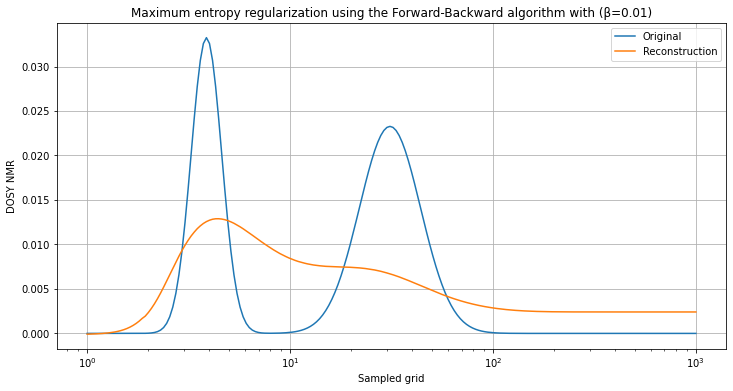

In [36]:
plt.figure(figsize=(12, 6))
plt.title(f"Maximum entropy regularization using the Forward-Backward algorithm with (β={beta})")
plt.plot(T_values, data, label="Original")
plt.plot(T_values, x_cur, label="Reconstruction")
plt.xlabel("Sampled grid")
plt.ylabel("DOSY NMR")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

For the Douglas Rachford algorithm : 

In [37]:
x_tol = 1e-3
beta = 1e-2

# Define the stepsize 
gamma = 0.1
Lambda = 1.95 # Close to the upper value to quickly converge

x_cur = np.ones(N) 
x_next = np.zeros(N)
while np.any(np.abs(x_next - x_cur) / (np.abs(x_cur) + 1e-8) > x_tol): 
    x_cur = x_next
    z_cur = np.linalg.inv(gamma*K_matrix.T@K_matrix+np.eye(N))@(gamma*K_matrix.T@y+x_cur)
    w_cur = gamma*beta*vector_lambert((2*z_cur-x_cur)/(gamma*beta)-1-np.log(gamma*beta))
    x_next = x_cur + Lambda*(w_cur-z_cur)
x_cur = x_next

error = normalized_quadratic_error(x_cur,data)

In [38]:
print(f"The best normalized quadratic error between the original and the reconstruction signals is : {round(error, 3)}")

The best normalized quadratic error between the original and the reconstruction signals is : 0.828


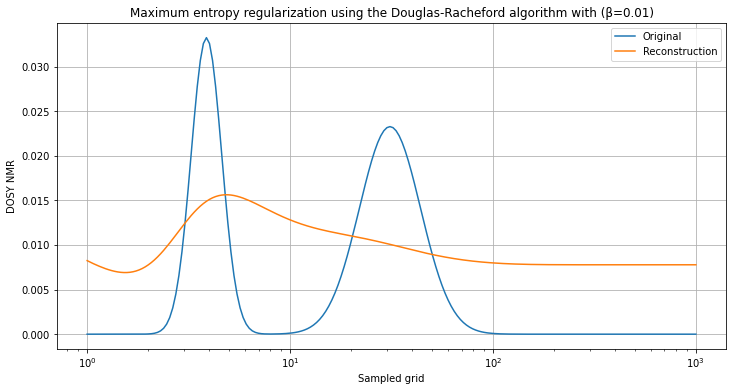

In [39]:
plt.figure(figsize=(12, 6))
plt.title(f"Maximum entropy regularization using the Douglas-Racheford algorithm with (β={beta})")
plt.plot(T_values, data, label="Original")
plt.plot(T_values, x_cur, label="Reconstruction")
plt.xlabel("Sampled grid")
plt.ylabel("DOSY NMR")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

6. What is the best choice for parameter $\beta$ in terms of reconstruction error between the estimated object and the ground truth ?

For the Forward-Backward algorithm : 

In [40]:
smallest_error = np.inf
best_beta = None
best_x_hat = None
best_iteration = None

In [41]:
x_tol = 1e-3
beta_values = np.linspace(1e-8, 1e-6, num = 5, endpoint=True) 
iter_values = []

for beta in beta_values:
    # Define the stepsize 
    Hessian = K_matrix.T @ K_matrix
    spectral_norm = np.linalg.norm(Hessian,ord=2) # 2-norm is spectral norm
    nu = spectral_norm  # lipschitz constant
    gamma = 1/nu # stepsize < 2/nu
    delta = 2 - gamma*nu/2
    Lambda = 0.9 #arbitraty for now

    assert delta - Lambda > 0
    
    x_cur = np.ones(N) 
    x_next = np.zeros(N)
    iter_beta = 0
    while np.any(np.abs(x_next - x_cur) / (np.abs(x_cur) + 1e-8) > x_tol): 
        x_cur = x_next
        z_cur = x_cur - gamma * gradient(x_cur) 
        x_next = z_cur + Lambda * (gamma*beta*vector_lambert(z_cur/(gamma*beta)-1-np.log(gamma*beta))- x_cur) # Projection using the Lambert function 
        iter_beta+=1
    x_cur = x_next

    iter_values.append(iter_beta)

    error = normalized_quadratic_error(x_cur,data)
    if error < smallest_error:
        smallest_error = error
        best_x_hat = x_cur
        best_beta = beta
        best_iteration = iter_beta
print(best_beta)

1e-06


In [42]:
print(f"The best normalized quadratic error between the original and the reconstruction signals is : {round(smallest_error, 3)}")

The best normalized quadratic error between the original and the reconstruction signals is : 0.127


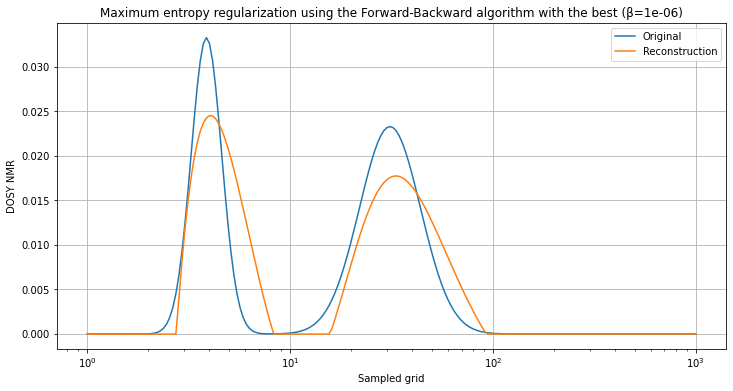

In [43]:
plt.figure(figsize=(12, 6))
plt.title(f"Maximum entropy regularization using the Forward-Backward algorithm with the best (β={beta})")
plt.plot(T_values, data, label="Original")
plt.plot(T_values, best_x_hat, label="Reconstruction")
plt.xlabel("Sampled grid")
plt.ylabel("DOSY NMR")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

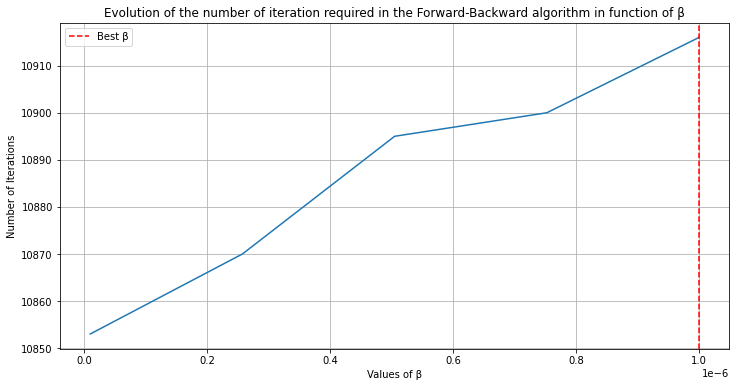

In [44]:
plt.figure(figsize=(12, 6))
plt.title(f"Evolution of the number of iteration required in the Forward-Backward algorithm in function of β")
plt.plot(beta_values, iter_values)
plt.axvline(x=best_beta, color = "red", linestyle = "--",label="Best β")
plt.xlabel("Values of β")
plt.ylabel("Number of Iterations")
plt.legend()
plt.grid()
plt.show()

For the Douglas-Rachford algorithm : 

In [45]:
smallest_error = np.inf
best_beta = None
best_x_hat = None
best_iteration = None
x_tol = 1e-3
beta_values = np.linspace(1e-8, 1e-6, num = 3, endpoint=True) 
iter_values = []
gamma = 0.1
Lambda = 1.95 

for beta in beta_values:
    x_cur = np.zeros(N) 
    x_next = np.ones(N)
    iter_beta = 0
    inv = np.linalg.inv(gamma*K_matrix.T@K_matrix+np.eye(N))
    while np.any(np.abs(x_next - x_cur) / (np.abs(x_cur) + 1e-8) > x_tol): 
        x_cur = x_next
        z_cur = inv@(gamma*K_matrix.T@y+x_cur)
        w_cur = gamma*beta*vector_lambert((2*z_cur-x_cur)/(gamma*beta)-1-np.log(gamma*beta))
        x_next = x_cur + Lambda*(w_cur-z_cur)
        iter_beta += 1

    x_cur = x_next

    iter_values.append(iter_beta)

    error = normalized_quadratic_error(x_cur,data)
    if error < smallest_error:
        smallest_error = error
        best_x_hat = x_cur
        best_beta = beta
        best_iteration = iter_beta
print(best_beta)

1e-06


In [46]:
print(f"The best normalized quadratic error between the original and the reconstruction signals is : {round(smallest_error, 3)}")

The best normalized quadratic error between the original and the reconstruction signals is : 0.258


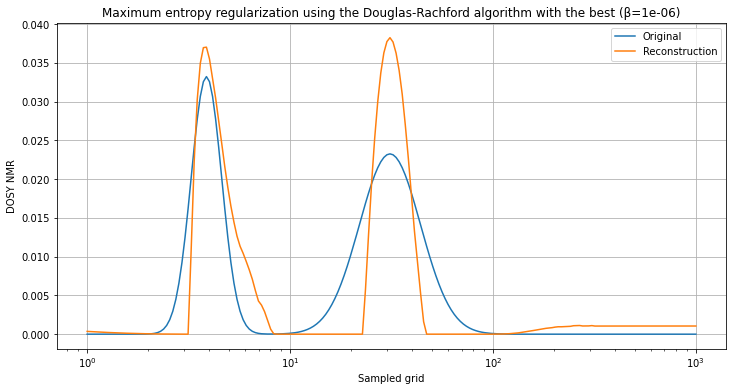

In [47]:
plt.figure(figsize=(12, 6))
plt.title(f"Maximum entropy regularization using the Douglas-Rachford algorithm with the best (β={beta})")
plt.plot(T_values, data, label="Original")
plt.plot(T_values, best_x_hat, label="Reconstruction")
plt.xlabel("Sampled grid")
plt.ylabel("DOSY NMR")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

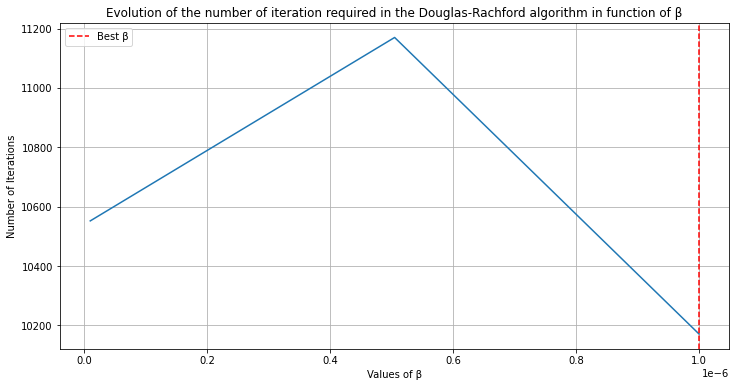

In [48]:
plt.figure(figsize=(12, 6))
plt.title(f"Evolution of the number of iteration required in the Douglas-Rachford algorithm in function of β")
plt.plot(beta_values, iter_values)
plt.axvline(x=best_beta, color = "red", linestyle = "--",label="Best β")
plt.xlabel("Values of β")
plt.ylabel("Number of Iterations")
plt.legend()
plt.grid()
plt.show()

We can see that the reconstruction error is smaller for the Forward-Backward algorithm, that also converges faster with a bit more iterations. 

Douglas-Rachford algorithm places better the two peaks even if the reconstruction error is higher. It converges with fewer steps but less fast as less steps are computed in the calculation. 

7. Compare the maximum entropy regularization with the ones proposed in the previous part in terms of reconstruction quality.


We can compare the results of all algorithms in terms of normalized quadratic error. Only the first algorithm, the smoothness prior, doesn't need some stopping criterion, named $x_{tol}$ in all the coding lines and fixed to $10^{-3}$.

$$
\begin{array}{|c|c|c|c|}
\hline
\textbf{Algorithm} & \textbf{Best beta value} & \textbf{Normalized quadratic error value} \\
\hline
\text{Smoothness prior} & \text{0.546} & \text{0.385} \\
\hline
\text{Smoothness prior + constraints} & \text{0.2} & \text{0.149} \\
\hline
\text{Sparsity prior} & \text{0.2} & \textbf{0.118} \\
\hline
\text{Forward-Backward} & \text{$10^{-6}$} & \text{0.127} \\
\hline
\text{Douglas-Rachford} & \text{$10^{-6}$} & \text{0.258} \\
\hline
\end{array}
$$


The sparsity prior yields the best result and reconstructs better the signal than the other variants, even for the Maximum entropy regularization methods, supposed to be more precise. But we had to fix a high value of the tolerance in order to converge within a reasonable amount of time. 

The parameter $\beta$ is here tuned thanks to a hyperparameter grid search. This is time-consuming and slows down our algorithms without properly tuning it : we only consider a limited amount of values when spanning a range of possible $\beta$ values. Therefore, we will try in the question 8 to overcome this issue by solving another optimization problem. 

8.  In practice, adjusting the parameter β may be difficult, while one has often informations about the level of noise corrupting the data. A more practical formulation may therefore be obtained by solving the following optimization problem :

$$minimize_{x \in \mathbb{R}^N} ent(x)  \text{ subject to } \Vert Kx − y \Vert^2 \ge \eta M \sigma^2$$ 

with $\eta > 0$. 

Propose an algorithm providing a numerical solution to this problem and implement it.

The optimization problem can be formulated as such $\hat{x} = \argmin_{x \in \mathbb{R}^N}(\text{ent}(x) + \iota_{\mathcal{B}(y,\sqrt{\eta M}\sigma)}(Kx))$

where we see the loss function can be written as $g = g_1(x_1) + g_2(x_2)$ with $x_1 \in \mathbb(R)^N$ and $x_2 \in K(\mathbb{R}^N)$. This allows us to use the formalism of the PPXA+ algorithm.
Noting $g_1(x_1) = \text{ent}(x)$ and $g_2(x_2) = \iota_{\mathcal{B}(y,\sqrt{\eta M}\sigma)}(x_2))$

We compute the proximal operators for $g_1$ and $g_2$.

We know from before that $\text{prox}_{\gamma g_1}(x_1)$ is given by the Lambert function.
Similarly we compute $\text{prox}_{\gamma g_2}(x_2) = \text{Proj}_{\mathcal{B}(y, \sqrt{\eta M} \sigma)}(x_2)= y + (x_2 - y) \min\left(1, \frac{\sqrt{M \eta} \sigma}{\|x_2 - y\|}\right)$.
$\text{prox}_{\gamma \phi}(x) = \argmin_{y \in \mathbb{R^{+*}}}(f_x(y) = y\log(y) +\frac{1}{\gamma}\|y-x\|^2)$

We can apply PPXA+.



In [56]:
v_tol = 1e-1

smallest_error = np.inf
best_eta = None
best_x_hat = None
best_iteration = None
eta_values = np.linspace(0.7, 1.2, num = 10, endpoint=True) 
iter_values = []
# Define the stepsize
gamma = 0.1
Lambda = 1.7 

inv = np.linalg.inv((K_matrix.T@K_matrix+np.eye(N)))

def prox_1(x_1):
    return  gamma*vector_lambert(x_1/gamma-1-np.log(gamma))

def prox_2(x_2):
    return y + (x_2 - y)*np.min([1,np.sqrt(M*eta)*sigma/(np.linalg.norm(x_2-y))])

for eta in eta_values:
    x_1_cur = np.zeros(N)
    x_2_cur = K_matrix@x_1_cur
    x_1_next = np.ones(N)
    x_2_next = K_matrix@x_1_next
    v_cur = inv@(x_1_cur + K_matrix.T@x_2_cur)
    v_next = inv@(x_1_next + K_matrix.T@x_2_next)
    iter_eta = 0

    while np.any(np.abs(v_next - v_cur) / (np.abs(v_cur) + 1e-8) > v_tol):
        x_1_cur = x_1_next
        x_2_cur = x_2_next
        v_cur = v_next
   
        y_1_cur = prox_1(x_1_cur)
        y_2_cur = prox_2(x_2_cur)

        c_cur = inv@(y_1_cur + K_matrix.T@y_2_cur)
   
        x_1_next = x_1_cur + Lambda*(2*c_cur - v_cur-y_1_cur)
        x_2_next = x_2_cur + Lambda*(K_matrix@(2*c_cur - v_cur)-y_2_cur)

        v_next = v_cur + Lambda*(c_cur - v_cur)
        iter_eta += 1
        
    iter_values.append(iter_eta)
    x_hat = v_next
    error = normalized_quadratic_error(x_hat,data)
    if error < smallest_error:
        smallest_error = error
        best_x_hat = x_hat
        best_eta = eta
        best_iteration = iter_eta

print(best_eta)

0.7


In [57]:
smallest_error

0.5929157061407676

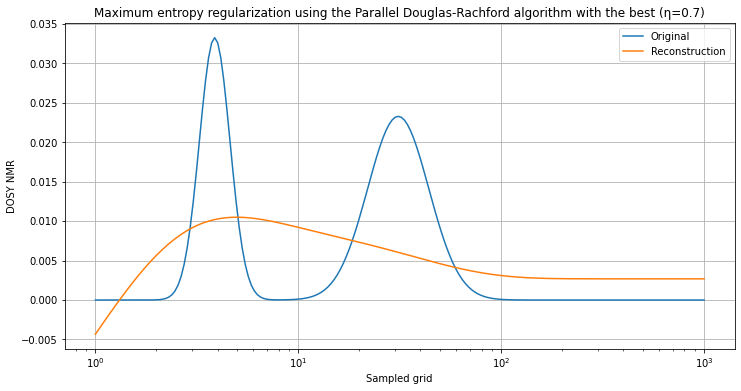

In [58]:
plt.figure(figsize=(12, 6))
plt.title(f"Maximum entropy regularization using the Parallel Douglas-Rachford algorithm with the best (η={ best_eta})")
plt.plot(T_values, data, label="Original")
plt.plot(T_values, best_x_hat, label="Reconstruction")
plt.xlabel("Sampled grid")
plt.ylabel("DOSY NMR")
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

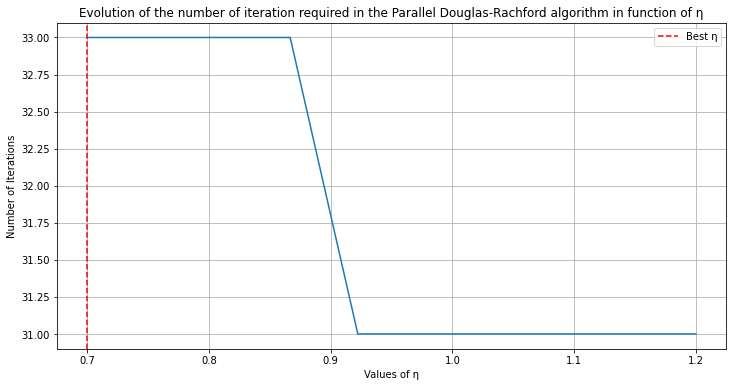

In [59]:
plt.figure(figsize=(12, 6))
plt.title(f"Evolution of the number of iteration required in the Parallel Douglas-Rachford algorithm in function of η")
plt.plot(eta_values, iter_values)
plt.axvline(x=best_eta, color = "red", linestyle = "--",label="Best η")
plt.xlabel("Values of η")
plt.ylabel("Number of Iterations")
plt.legend()
plt.grid()
plt.show()

The reconstruction by parallelizing the Douglas-Rachford algorithm doesn't improve the simple Douglas-Rachford computation because it is really long to compute for a tolerance of $10^{-2}$. Therefore, we computed it for a tolerance of $10^{-1}$ to be faster to compute. But the result is really imprecise, as we should have an improve in the previous algorithm. 
Also, the values of the parameter $\lambda$ and $\gamma$ can be changed but lead to a lot of computation... 
The negative values are probably due to some error propagation in the Lambert W function.

With more computation power, we could try to improve this result that should be located between the Douglas-Rachford and the Forward-Backward algorithm in terms of normalized quadratic error minimization. 